The description of CIFAR-10 dataset  
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.  

It has ten classes  
‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’





# Load Dataset

In [26]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [27]:
# load train and test dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 32, 32, -1))
testX = testX.reshape((testX.shape[0], 32, 32, -1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
print(trainX[0])
print(testX[0])
trainX.shape,trainY.shape,testX.shape,testY.shape

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ..

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [28]:
# scale pixels
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0
trainX[0], testX[0]

(array([[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],
 
        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],
 
        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],
 
        ...,
 
        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333

# Build model

In [29]:
# define cnn model, 3 hidden layers and fully connected layer
model = Sequential()        
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)        

In [30]:
# train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,testY))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8491 - accuracy: 0.3246 - val_loss: 1.3707 - val_accuracy: 0.5031
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3089 - accuracy: 0.5323 - val_loss: 1.1834 - val_accuracy: 0.5825
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0980 - accuracy: 0.6134 - val_loss: 1.0166 - val_accuracy: 0.6404
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9385 - accuracy: 0.6723 - val_loss: 0.9392 - val_accuracy: 0.6728
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8117 - accuracy: 0.7186 - val_loss: 0.9075 - val_accuracy: 0.6813
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7198 - accuracy: 0.7491 - val_loss: 0.8833 - val_accuracy: 0.6990
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6466 - accuracy: 0.7776 - val_loss: 0.8493 - val_accuracy:

Visualize the training Curve

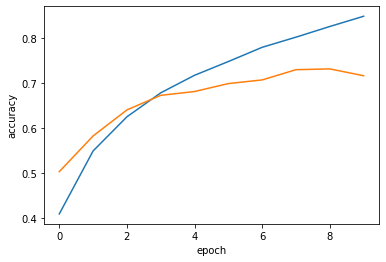

In [31]:
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['accuracy'], label='training_accuracy')
pyplot.plot(history.history['val_accuracy'], label='validation_accuracy')
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.show()

Save the model

In [32]:
model.save('cifar10_cnn_model.md')

INFO:tensorflow:Assets written to: cifar10_cnn_model.md/assets


Load model and evaluate the model

In [34]:
# load model
model_cnn = tf.keras.models.load_model('cifar10_cnn_model.md')
# evaluate model on test dataset
loss, acc = model_cnn.evaluate(testX, testY,verbose=2)
print('> %.3f' % (acc * 100.0))

313/313 - 1s - loss: 0.9134 - accuracy: 0.7164
> 71.640


Prediction

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


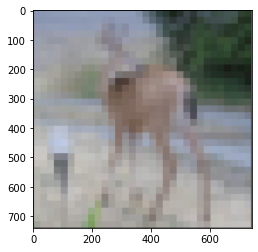

In [103]:
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

drive.mount('/content/drive')
path = "/content/drive/My Drive"
os.chdir(path)
os.listdir(path)

img1 = mpimg.imread('Colab Notebooks/sample.png')
imgplot = plt.imshow(img1)
plt.show()

In [133]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np

def load_image(filename):
    #load the image
    img = load_img(filename, target_size=(32,32,3))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape((1,32, 32,3))
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
img = load_image('Colab Notebooks/sample.png')
label = np.argmax(model.predict(img), axis=-1)
#label = model_cnn.predict_classes(img)
print(label)
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f'the image is {classes[label[0]]}')

[4]
the image is deer
